In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

In [2]:
df = pd.read_csv("..\data\exoplanets_cleaned.csv")

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_448\1690882571.py:1: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv("..\data\exoplanets_cleaned.csv")


In [3]:
df.sample(5)

,kepid,kepoi_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
7343,8780959,K03741.03,CONFIRMED,CANDIDATE,0.996,0,0,0,0,5.111755,...,-214,4.207,0.190,-0.171,1.345,0.382,-0.313,300.33237,44.986141,13.306
3223,7269974,K00456.02,CONFIRMED,CANDIDATE,1.000,0,0,0,0,4.309382,...,-74,4.332,0.137,-0.100,1.089,0.161,-0.145,287.77356,42.869282,14.619
230,8013419,K00901.01,CANDIDATE,CANDIDATE,1.000,0,0,0,0,12.732624,...,-301,4.721,0.104,-0.085,0.541,0.107,-0.107,285.16748,43.876339,15.750
2385,5688910,K02856.01,CONFIRMED,CANDIDATE,0.918,0,0,0,0,25.873091,...,-211,4.382,0.090,-0.210,1.093,0.345,-0.148,285.79724,40.936180,15.323
4796,4927734,K03212.01,FALSE POSITIVE,FALSE POSITIVE,0.000,1,0,0,0,3.000119,...,-366,3.970,0.234,-0.126,2.485,0.542,-0.812,292.91702,40.092430,11.960


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 46 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   kepid              9564 non-null   int64  
 1   kepoi_name         9564 non-null   object 
 2   koi_disposition    9564 non-null   object 
 3   koi_pdisposition   9564 non-null   object 
 4   koi_score          9564 non-null   float64
 5   koi_fpflag_nt      9564 non-null   int64  
 6   koi_fpflag_ss      9564 non-null   int64  
 7   koi_fpflag_co      9564 non-null   int64  
 8   koi_fpflag_ec      9564 non-null   int64  
 9   koi_period         9564 non-null   float64
 10  koi_period_err1    9564 non-null   float64
 11  koi_period_err2    9564 non-null   float64
 12  koi_time0bk        9564 non-null   float64
 13  koi_time0bk_err1   9564 non-null   float64
 14  koi_time0bk_err2   9564 non-null   float64
 15  koi_impact         9564 non-null   float64
 16  koi_impact_err1    9564 

In [5]:
df.isnull().sum()

kepid                0
kepoi_name           0
koi_disposition      0
koi_pdisposition     0
koi_score            0
koi_fpflag_nt        0
koi_fpflag_ss        0
koi_fpflag_co        0
koi_fpflag_ec        0
koi_period           0
koi_period_err1      0
koi_period_err2      0
koi_time0bk          0
koi_time0bk_err1     0
koi_time0bk_err2     0
koi_impact           0
koi_impact_err1      0
koi_impact_err2      0
koi_duration         0
koi_duration_err1    0
koi_duration_err2    0
koi_depth            0
koi_depth_err1       0
koi_depth_err2       0
koi_prad             0
koi_prad_err1        0
koi_prad_err2        0
koi_teq              0
koi_insol            0
koi_insol_err1       0
koi_insol_err2       0
koi_model_snr        0
koi_tce_plnt_num     0
koi_tce_delivname    0
koi_steff            0
koi_steff_err1       0
koi_steff_err2       0
koi_slogg            0
koi_slogg_err1       0
koi_slogg_err2       0
koi_srad             0
koi_srad_err1        0
koi_srad_err2        0
ra         

In [6]:
df.shape

(9564, 46)

In [7]:
df.columns

Index(['kepid', 'kepoi_name', 'koi_disposition', 'koi_pdisposition',
       'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss', 'koi_fpflag_co',
       'koi_fpflag_ec', 'koi_period', 'koi_period_err1', 'koi_period_err2',
       'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 'koi_impact',
       'koi_impact_err1', 'koi_impact_err2', 'koi_duration',
       'koi_duration_err1', 'koi_duration_err2', 'koi_depth', 'koi_depth_err1',
       'koi_depth_err2', 'koi_prad', 'koi_prad_err1', 'koi_prad_err2',
       'koi_teq', 'koi_insol', 'koi_insol_err1', 'koi_insol_err2',
       'koi_model_snr', 'koi_tce_plnt_num', 'koi_tce_delivname', 'koi_steff',
       'koi_steff_err1', 'koi_steff_err2', 'koi_slogg', 'koi_slogg_err1',
       'koi_slogg_err2', 'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 'ra',
       'dec', 'koi_kepmag'],
      dtype='object')

In [8]:
df = df.drop(columns=['kepid', 'kepoi_name', 'koi_pdisposition','ra', 'dec', 'koi_tce_plnt_num','koi_tce_delivname', 'koi_kepmag'])

In [9]:
df = df.drop(columns=[col for col in df.columns if '_err' in col])

In [10]:
df.shape

(9564, 18)

In [11]:
df.head()

,koi_disposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_time0bk,koi_impact,koi_duration,koi_depth,koi_prad,koi_teq,koi_insol,koi_model_snr,koi_steff,koi_slogg,koi_srad
0,CONFIRMED,1.000,0,0,0,0,9.488036,170.538750,0.146,2.95750,615.8,2.26,793,93.59,35.8,5455,4.467,0.927
1,CONFIRMED,0.969,0,0,0,0,54.418383,162.513840,0.586,4.50700,874.8,2.83,443,9.11,25.8,5455,4.467,0.927
2,CANDIDATE,0.000,0,0,0,0,19.899140,175.850252,0.969,1.78220,10829.0,14.60,638,39.30,76.3,5853,4.544,0.868
3,FALSE POSITIVE,0.000,0,1,0,0,1.736952,170.307565,1.276,2.40641,8079.2,33.46,1395,891.96,505.6,5805,4.564,0.791
4,CONFIRMED,1.000,0,0,0,0,2.525592,171.595550,0.701,1.65450,603.3,2.75,1406,926.16,40.9,6031,4.438,1.046


In [12]:
df.columns

Index(['koi_disposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk',
       'koi_impact', 'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq',
       'koi_insol', 'koi_model_snr', 'koi_steff', 'koi_slogg', 'koi_srad'],
      dtype='object')

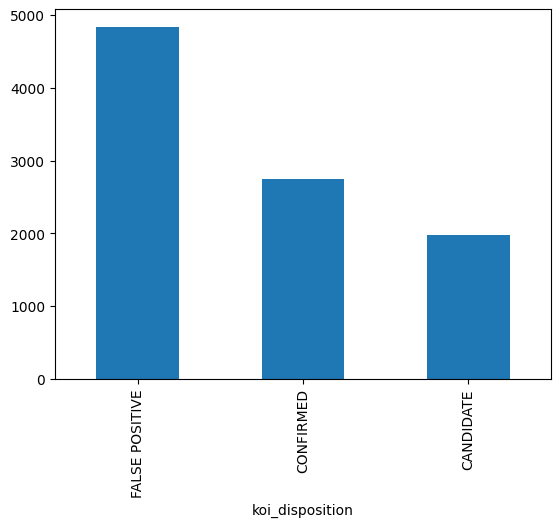

In [13]:
df['koi_disposition'].value_counts().plot(kind='bar')
plt.show()

<Axes: xlabel='koi_score', ylabel='Count'>

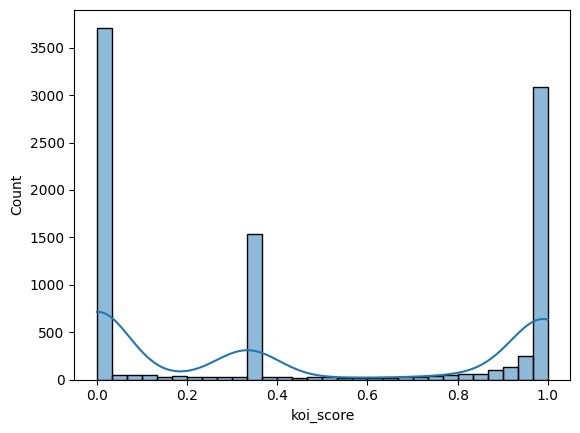

In [14]:
sns.histplot(df['koi_score'],bins=30, kde=True)


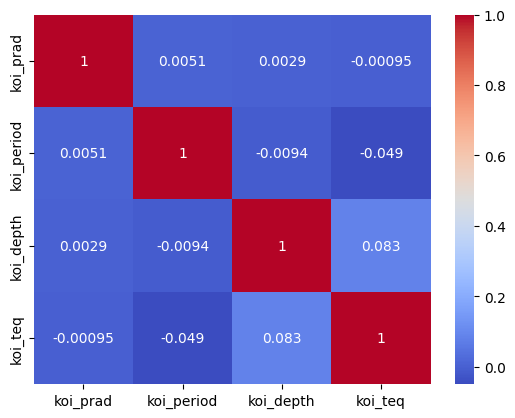

In [15]:
corr = df[['koi_prad','koi_period','koi_depth','koi_teq']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

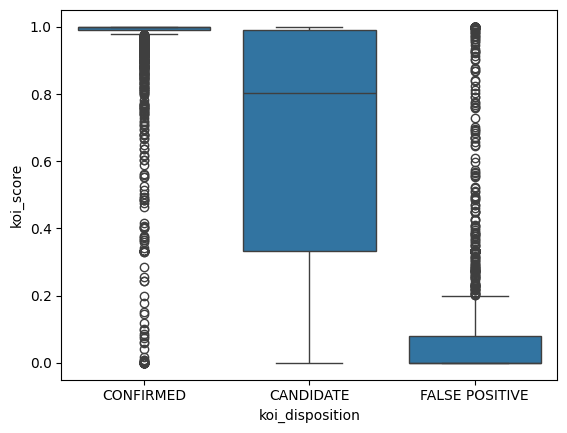

In [16]:
sns.boxplot(x='koi_disposition', y='koi_score', data=df)
plt.show()


In [17]:
confirmed = df[df['koi_disposition'] == 'CONFIRMED']
Q1 = confirmed['koi_score'].quantile(0.25)
Q3 = confirmed['koi_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
confirmed_clean = confirmed[(confirmed['koi_score'] >= lower) & (confirmed['koi_score'] <= upper)]

candidate = df[df['koi_disposition'] == 'CANDIDATE']
Q1 = candidate['koi_score'].quantile(0.25)
Q3 = candidate['koi_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
candidate_clean = candidate[(candidate['koi_score'] >= lower) & (candidate['koi_score'] <= upper)]

false_positive = df[df['koi_disposition'] == 'FALSE POSITIVE']
Q1 = false_positive['koi_score'].quantile(0.25)
Q3 = false_positive['koi_score'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
false_positive_clean = false_positive[(false_positive['koi_score'] >= lower) & (false_positive['koi_score'] <= upper)]

df_clean = pd.concat([confirmed_clean, candidate_clean, false_positive_clean])

print("Before:", df.shape[0])
print("After:", df_clean.shape[0])

Before: 9564
After: 7974


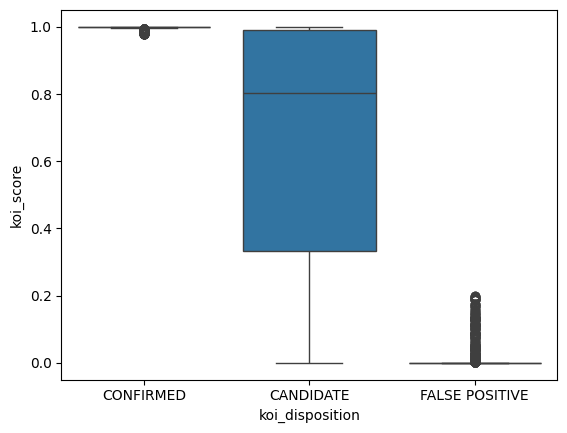

In [18]:
sns.boxplot(x='koi_disposition', y='koi_score', data=df_clean)
plt.show()

In [19]:
from scipy import stats
import numpy as np

z_scores = np.abs(stats.zscore(df_clean[['koi_score','koi_prad','koi_depth']]))
outliers = (z_scores > 3).any(axis=1)
print("outliers:", outliers.sum())

outliers: 262


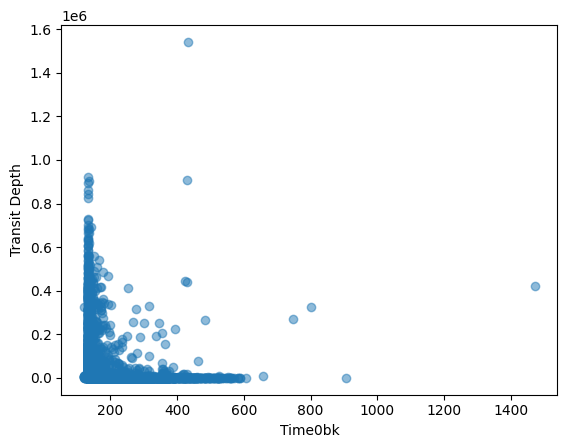

In [20]:
plt.scatter(df['koi_time0bk'], df['koi_depth'], alpha=0.5)
plt.xlabel("Time0bk")
plt.ylabel("Transit Depth")
plt.show()

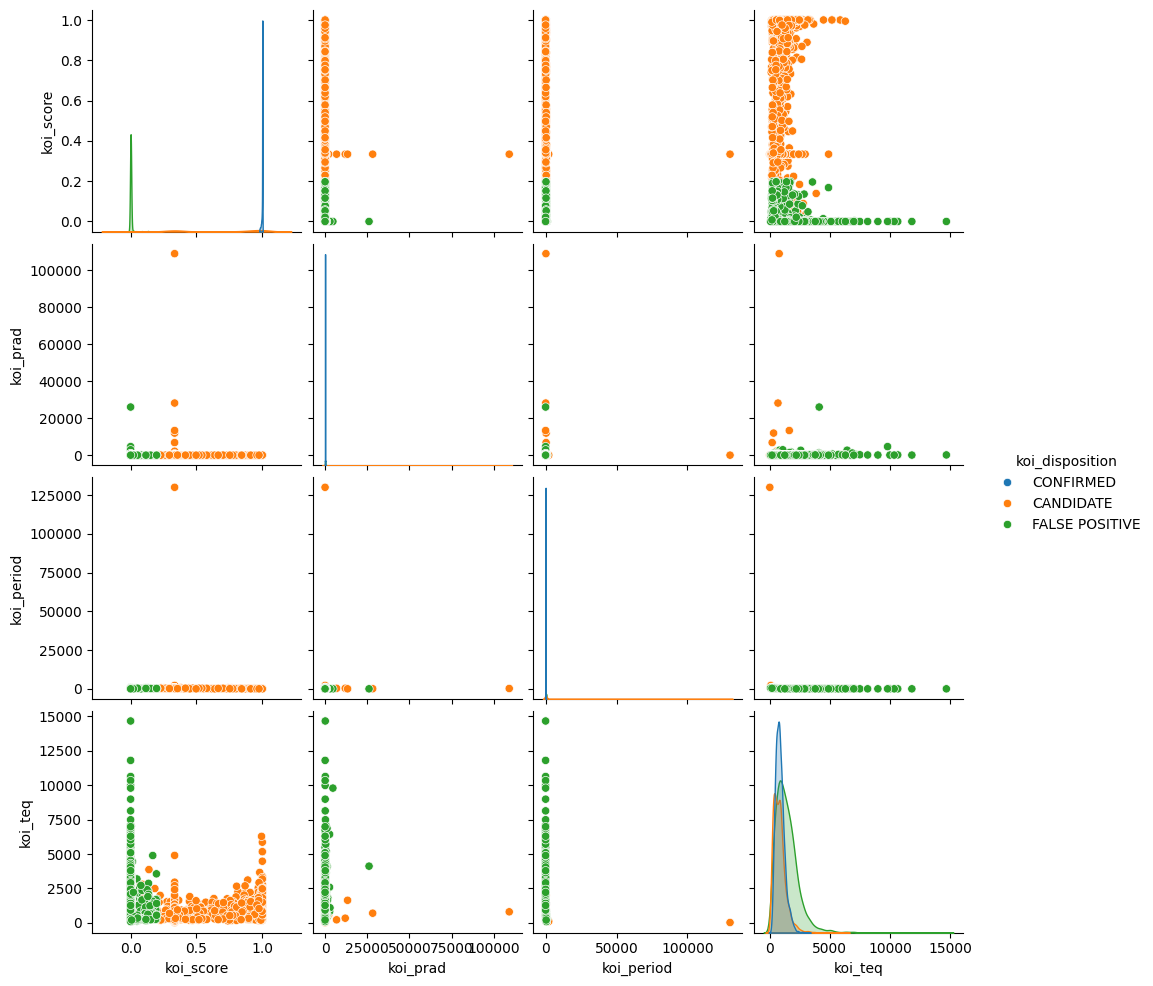

In [21]:
sns.pairplot(df_clean[['koi_score','koi_prad','koi_period','koi_teq','koi_disposition']],hue='koi_disposition')
plt.show()


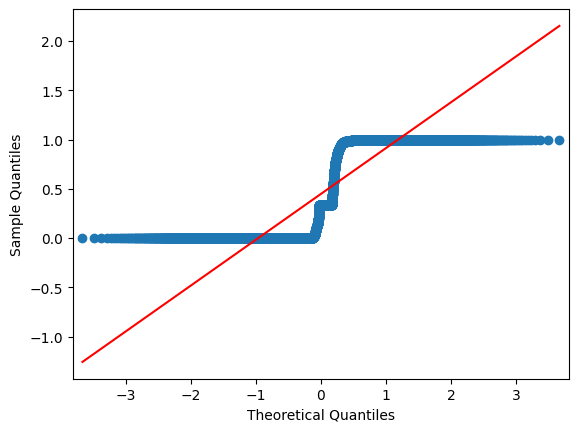

In [22]:
sm.qqplot(df_clean['koi_score'].dropna(), line='s')
plt.show()

In [23]:
df_clean.groupby('koi_disposition')['koi_score'].describe()

,count,mean,std,min,25%,50%,75%,max
koi_disposition,,,,,,,,
CANDIDATE,1979.0,0.657543,0.335861,0.000,0.334,0.802,0.989,1.000
CONFIRMED,2260.0,0.997817,0.004454,0.978,0.998,1.000,1.000,1.000
FALSE POSITIVE,3735.0,0.004840,0.023576,0.000,0.000,0.000,0.000,0.198


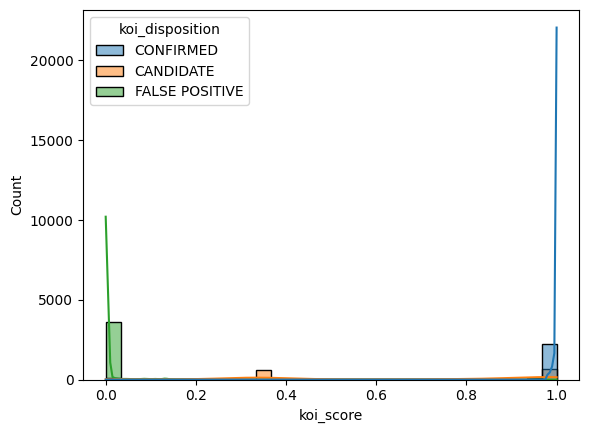

In [24]:
sns.histplot(data=df_clean, x='koi_score', hue='koi_disposition', kde=True, bins=30)
plt.show()


In [25]:
df_clean.to_csv("..\data\exoplanents_cleaned_new.csv", index=False)

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\hp\AppData\Local\Temp\ipykernel_448\3676722619.py:1: SyntaxWarning: invalid escape sequence '\d'
  df_clean.to_csv("..\data\exoplanents_cleaned_new.csv", index=False)


In [26]:
df_clean.shape

(7974, 18)